In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import seaborn as sns

In [58]:
df = pd.read_csv("jio_mart_items.csv")

In [59]:
df.head()

,category,sub_category,href,items,price
0,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Fresh Dates (Pack) (Approx 450 g - 500 g),109.0
1,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Tender Coconut Cling Wrapped (1 pc) (Approx 90...,49.0
2,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Mosambi 1 kg,69.0
3,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Orange Imported 1 kg,125.0
4,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...,44.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162313 entries, 0 to 162312
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   category      162313 non-null  object 
 1   sub_category  162313 non-null  object 
 2   href          162313 non-null  object 
 3   items         162280 non-null  object 
 4   price         162282 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.2+ MB


In [61]:
df.drop(['href'],axis=1,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162313 entries, 0 to 162312
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   category      162313 non-null  object 
 1   sub_category  162313 non-null  object 
 2   items         162280 non-null  object 
 3   price         162282 non-null  float64
dtypes: float64(1), object(3)
memory usage: 5.0+ MB


In [63]:
df.dropna(inplace=True)

In [64]:
df.isna().sum()

category        0
sub_category    0
items           0
price           0
dtype: int64

In [65]:
df['category'].value_counts()

Home & Kitchen    60329
Groceries         46043
Fashion           26087
Electronics       19018
Beauty            10733
Jewellery            70
Name: category, dtype: int64

In [66]:
df['sub_category'].value_counts()

Women                                  9592
Personal Care                          9505
Men                                    9188
Mom & Baby Care                        9092
Toys, Games & Fitness                  8594
                                       ... 
Fitness                                   3
Building Supplies & Measuring Tools       1
Personal Wear                             1
Ayush                                     1
Treatments                                1
Name: sub_category, Length: 69, dtype: int64

In [67]:
df['items'].value_counts()

Kiddiewink Cute Kid's Soft Velvet Animal Cartoon School Backpack Bag for Baby Boy/Girl(2-6 Years) Pack of 2    425
Black Product                                                                                                  335
Mriyangni Pendant Wall Lamp (Pack Of 2)                                                                        268
Mriyangni Pendants Ceiling Lamp                                                                                210
StoleVilla Women's Printed Chiffon Multicolored Scarf and Stoles with Tassels - Set of 2                       197
                                                                                                              ... 
Nouvetta Turbo Grey Stainless Steel Double Walled Bottle 650 ml (NB-18628)                                       1
Nouvetta Summer Red Stainless Steel Double Walled Water Bottle 800 ml (NB-622)                                   1
Nouvetta Summer Black Stainless Steel Double Wall Insulated Bottle 800 ml (NB186

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


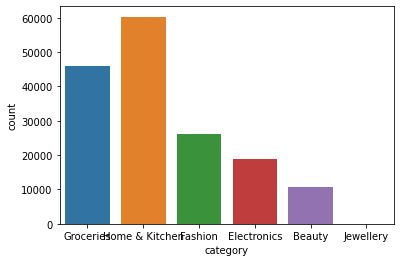

In [68]:
sns.countplot(df['category'])

In [69]:
df.head()

,category,sub_category,items,price
0,Groceries,Fruits & Vegetables,Fresh Dates (Pack) (Approx 450 g - 500 g),109.0
1,Groceries,Fruits & Vegetables,Tender Coconut Cling Wrapped (1 pc) (Approx 90...,49.0
2,Groceries,Fruits & Vegetables,Mosambi 1 kg,69.0
3,Groceries,Fruits & Vegetables,Orange Imported 1 kg,125.0
4,Groceries,Fruits & Vegetables,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...,44.0


In [87]:
x=df['items']
x

0                         fresh date pack approx g g
1         tender coconut cling wrapped pc approx g g
2                                         mosambi kg
3                                 orange imported kg
4                   banana robusta pc box approx g g
                             ...                    
162308      reliance jewel ag gm ganesha silver idol
162309      reliance jewel ag gm ganesha silver idol
162310      reliance jewel ag gm ganesha silver idol
162311      reliance jewel ag gm ganesha silver idol
162312       reliance jewel ag gm balaji silver idol
Name: items, Length: 162280, dtype: object

In [88]:
y=df['category']
y

0         Groceries
1         Groceries
2         Groceries
3         Groceries
4         Groceries
            ...    
162308    Jewellery
162309    Jewellery
162310    Jewellery
162311    Jewellery
162312    Jewellery
Name: category, Length: 162280, dtype: object

In [89]:
import nltk 

nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download("punkt")


from  nltk.corpus import stopwords
nltk.download("stopwords")

from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [90]:
def clean_sent(text):
  lemma=WordNetLemmatizer()
  ftoken=[lemma.lemmatize(i) for i in word_tokenize(text.lower()) if i.isalpha() and i not in stopwords.words("english") ]
  return " ".join(ftoken)

In [91]:
df["items"]=df['items'].apply(clean_sent)

In [92]:
df.head()

,category,sub_category,items,price
0,Groceries,Fruits & Vegetables,fresh date pack approx g g,109.0
1,Groceries,Fruits & Vegetables,tender coconut cling wrapped pc approx g g,49.0
2,Groceries,Fruits & Vegetables,mosambi kg,69.0
3,Groceries,Fruits & Vegetables,orange imported kg,125.0
4,Groceries,Fruits & Vegetables,banana robusta pc box approx g g,44.0


In [93]:
x.shape

(162280,)

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=1600)
x = cv.fit_transform(x)

AttributeError: ignored

In [96]:
xtrain,xtest,ytrain,ytest= train_test_split(x , y , test_size=0.3 , random_state=1)

In [97]:
mnb = MultinomialNB()
mnb.fit(xtrain , ytrain)

MultinomialNB()

In [98]:
pred = mnb.predict(xtest)

In [99]:
# print(accuracy_score(ytest , pred))
# print(confusion_matrix(ytest , pred))
print(classification_report(ytest , pred))

                precision    recall  f1-score   support

        Beauty       0.89      0.91      0.90      3275
   Electronics       0.97      0.97      0.97      5769
       Fashion       0.98      0.96      0.97      7792
     Groceries       0.96      0.92      0.94     13814
Home & Kitchen       0.95      0.97      0.96     18013
     Jewellery       1.00      1.00      1.00        21

      accuracy                           0.95     48684
     macro avg       0.96      0.96      0.96     48684
  weighted avg       0.95      0.95      0.95     48684



In [100]:

def predict(sent):
  sent=clean_sent(sent)
  sent = cv.transform([sent])
  pred = mnb.predict(sent)
  return pred

In [101]:
abc='bottle'
res= predict(abc)
print(res)

ValueError: ignored

In [ ]:
sen= 'mango banana apple'
res= predict(sen)
print(res)